In [1]:
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('./data/production_plant/'))

['C11.csv', 'C13-1.csv', 'C13-2.csv', 'C14.csv', 'C15.csv', 'C16.csv', 'C7-1.csv', 'C7-2.csv', 'C8.csv', 'C9.csv']


In [3]:
files_list = os.listdir('./data/production_plant/')

In [4]:
number_rows = 0 # total number of rows if all the datasets are joined together
for file in files_list:
    df = pd.read_csv(f'./data/production_plant/{file}', delimiter=',')
    df.dataframeName = file
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns in {file}')
    number_rows = number_rows + nRow

There are 18429 rows and 26 columns in C11.csv
There are 19749 rows and 26 columns in C13-1.csv
There are 3921 rows and 26 columns in C13-2.csv
There are 32848 rows and 26 columns in C14.csv
There are 30737 rows and 26 columns in C15.csv
There are 21021 rows and 26 columns in C16.csv
There are 16973 rows and 26 columns in C7-1.csv
There are 34698 rows and 26 columns in C7-2.csv
There are 15803 rows and 26 columns in C8.csv
There are 34245 rows and 26 columns in C9.csv


In [5]:
number_rows

228424

In [6]:
df.head()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-32.881632,-57.008978,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-65.414477,-100.0,-100.0,-100.0
1,1,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.423674,-57.087620,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-64.943926,-100.0,-100.0,-100.0
2,2,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.383021,-56.982764,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-65.006666,-100.0,-100.0,-100.0
3,3,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.477878,-57.048299,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-67.500588,-100.0,-100.0,-100.0
4,4,-86.909643,-66.186156,-49.950454,-56.782272,-55.576624,-56.891803,-33.396572,-56.995871,-64.332791,...,-87.376367,-73.549015,-82.398205,-83.984598,-25.448693,-87.350998,-82.150420,-100.0,-100.0,-100.0


# creating dataframes with respective rtf_ids


In [7]:
df11 = pd.read_csv(f'./data/production_plant/{files_list[0]}', delimiter = ',')
df11.insert(0, "rtf_id", 11)

df13_1 = pd.read_csv(f'./data/production_plant/{files_list[1]}', delimiter = ',')
df13_2 = pd.read_csv(f'./data/production_plant/{files_list[2]}', delimiter = ',')
last_df13_1 = int(df13_1.tail(1)["Timestamp"]) # getting the last cycle value
df13_2["Timestamp"] = df13_2["Timestamp"] + last_df13_1 + 1 # concatenating the second dataset's timestamp to the first one
df13 = pd.concat([df13_1,df13_2], ignore_index= True)
df13.insert(0, "rtf_id", 13)

df14 = pd.read_csv(f'./data/production_plant/{files_list[3]}', delimiter = ',')
df14.insert(0, "rtf_id", 14)

df15 = pd.read_csv(f'./data/production_plant/{files_list[4]}', delimiter = ',')
df15.insert(0, "rtf_id", 15)

df16 = pd.read_csv(f'./data/production_plant/{files_list[5]}', delimiter = ',')
df16.insert(0, "rtf_id", 16)


df7_1 = pd.read_csv(f'./data/production_plant/{files_list[6]}', delimiter = ',')
df7_2 = pd.read_csv(f'./data/production_plant/{files_list[7]}', delimiter = ',')
last_df7_1 = int(df7_1.tail(1)["Timestamp"]) # getting the last cycle value
df7_2["Timestamp"] = df7_2["Timestamp"] + last_df7_1 + 1 # concatenating the second dataset's timestamp to the first one
df7 = pd.concat([df7_1,df7_2], ignore_index= True)
df7.insert(0, "rtf_id", 7)

df8 = pd.read_csv(f'./data/production_plant/{files_list[8]}', delimiter = ',')
df8.insert(0, "rtf_id", 8)

df9 = pd.read_csv(f'./data/production_plant/{files_list[9]}', delimiter = ',')
df9.insert(0, "rtf_id", 9)


In [8]:
df_list = [ df7,  df8,  df9, df11, df13, df14, df15, df16]

# Looking for nan values

In [9]:
for d in df_list: 
    nan_in_df = d.isnull().values.any()
    print(nan_in_df)


True
False
False
False
False
True
True
False


In [10]:
df7[df7.isna().any(axis=1)]

,rtf_id,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
26107,7,26107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26108,7,26108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26109,7,26109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26110,7,26110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df7.shape

(51671, 27)

In [12]:
df7.iloc[26107 -3: 26107 + 8]

,rtf_id,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
26104,7,26104,-99.331815,-79.731577,-12.706761,-24.749230,-22.448703,-24.852459,-22.257606,-24.805033,...,-98.807097,-74.522579,-81.254676,-93.610953,-25.139694,-97.676714,-63.234256,-100.0,-100.0,-100.0
26105,7,26105,-99.331815,-79.731577,-12.706761,-24.749230,-22.448703,-24.852459,-22.257606,-24.805033,...,-98.807097,-74.522579,-81.254676,-93.610953,-25.139694,-97.676714,-63.234256,-100.0,-100.0,-100.0
26106,7,26106,-99.331815,-79.731577,-12.706761,-24.749230,-22.448703,-24.852459,-22.257606,-24.805033,...,-98.807097,-74.522579,-81.254676,-93.610953,-25.139694,-97.676714,-63.234256,-100.0,-100.0,-100.0
26107,7,26107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26108,7,26108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26109,7,26109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26110,7,26110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26111,7,26111,-99.331815,-79.731577,-12.722006,-24.867239,-22.380985,-24.852459,-22.284708,-24.870568,...,-98.761797,-75.615966,-81.799722,-93.653736,-24.645294,-97.600790,-63.908713,-100.0,-100.0,-100.0
26112,7,26112,-99.331815,-79.731577,-12.432350,-24.827903,-22.299722,-24.852459,-22.284708,-24.791926,...,-98.761797,-75.615966,-81.799722,-93.696520,-24.645294,-97.600790,-63.877343,-100.0,-100.0,-100.0
26113,7,26113,-99.331815,-79.731577,-12.508575,-24.867239,-22.380985,-24.813115,-22.257606,-24.818140,...,-98.761797,-75.615966,-81.799722,-93.696520,-24.645294,-97.600790,-64.222414,-100.0,-100.0,-100.0


In [21]:
df7 = df7.fillna(df7.iloc[26107 -3: 26107 + 8].mean())

In [19]:
df14 = df14.fillna(df14.iloc[18812 -3: 18812 + 8].mean())
df15 = df15.fillna(df15.iloc[15914 -3: 15914 + 8].mean())

In [23]:
# df7.iloc[26107 -3: 26107 + 8]

In [24]:
df_list_new = [ df7,  df8,  df9, df11, df13, df14, df15, df16]

In [25]:
df = pd.concat(df_list_new, ignore_index = True)

In [26]:
df.rename(columns={'Timestamp': 'cycle'}, inplace = True)
df

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,7,0,-99.331815,-79.731577,-49.996189,-56.874058,-55.671430,-57.022951,-55.660953,-57.035192,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.0,-100.0
1,7,1,-99.331815,-79.731577,-50.087659,-56.874058,-55.617255,-56.970492,-55.498340,-57.087620,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.0,-100.0
2,7,2,-96.142749,-71.343358,-50.118149,-56.978955,-55.603711,-57.140984,-55.538993,-57.048299,...,-97.402793,-71.781622,-84.311211,-93.610953,-23.687395,-97.509680,-71.139518,-100.0,-100.0,-100.0
3,7,3,-88.883827,-59.724121,-50.102904,-56.874058,-55.671430,-56.983607,-55.593197,-57.035192,...,-90.033974,-57.552610,-84.311211,-85.852824,-12.887859,-89.826133,-68.708337,-100.0,-100.0,-100.0
4,7,4,-66.985573,-50.316888,-50.148639,-56.992067,-55.590167,-57.062295,-55.674504,-57.035192,...,-68.244616,-45.735041,-84.311211,-65.288078,-10.575512,-67.853618,-67.030037,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228419,16,21016,-91.921033,-54.939729,-12.645781,-24.723005,-22.313266,-24.747541,-22.298259,-24.844354,...,-92.374480,-20.766869,-80.250080,-87.664005,-25.706193,-92.346823,-30.123128,-100.0,-100.0,-100.0
228420,16,21017,-99.331815,-79.731577,-12.706761,-24.762342,-22.448703,-24.813115,-22.284708,-24.831247,...,-97.689694,-74.223021,-80.250080,-93.511124,-25.917343,-97.585605,-60.269783,-100.0,-100.0,-100.0
228421,16,21018,-99.331815,-79.731577,-12.706761,-24.736117,-22.313266,-24.826230,-22.271157,-24.857461,...,-97.689694,-74.223021,-80.250080,-93.511124,-26.303592,-97.585605,-59.062034,-100.0,-100.0,-100.0
228422,16,21019,-99.331815,-79.731577,-12.462840,-24.893464,-22.380985,-24.865574,-22.284708,-24.791926,...,-97.689694,-74.223021,-80.250080,-93.511124,-26.725892,-97.585605,-61.242256,-100.0,-100.0,-100.0


# Data preparation

In [27]:
df[df.isna().any(axis=1)] # kurz vor dem Failure?
# interpolation, einfach weniger cycles in dem window wo die cycles fehlen
# im projekt erwähnen
# df_nan = df.copy()
# nan = df_nan[df_nan.isna().any(axis=1)]
# nan


,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5


In [29]:
rtf_ids = df['rtf_id'].unique() 
rtf_ids

array([ 7,  8,  9, 11, 13, 14, 15, 16], dtype=int64)

In [30]:
train_df = df.loc[df['rtf_id'].isin(list(rtf_ids[:6]))]
train_df["rtf_id"].unique()

array([ 7,  8,  9, 11, 13, 14], dtype=int64)

In [31]:
test_df = df.loc[df['rtf_id'].isin(list(rtf_ids[6:]))]
test_df["rtf_id"].unique()

array([15, 16], dtype=int64)

# RUL prediction using Pipeline

In [46]:
import importlib
import rul
importlib.reload(rul)

<module 'rul' from 'c:\\Users\\I539001\\OneDrive - SAP SE\\PA2\\AL\\AutoRUL\\rul.py'>

In [33]:
train_df

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,7,0,-99.331815,-79.731577,-49.996189,-56.874058,-55.671430,-57.022951,-55.660953,-57.035192,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.000000,-100.000000
1,7,1,-99.331815,-79.731577,-50.087659,-56.874058,-55.617255,-56.970492,-55.498340,-57.087620,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.000000,-100.000000
2,7,2,-96.142749,-71.343358,-50.118149,-56.978955,-55.603711,-57.140984,-55.538993,-57.048299,...,-97.402793,-71.781622,-84.311211,-93.610953,-23.687395,-97.509680,-71.139518,-100.0,-100.000000,-100.000000
3,7,3,-88.883827,-59.724121,-50.102904,-56.874058,-55.671430,-56.983607,-55.593197,-57.035192,...,-90.033974,-57.552610,-84.311211,-85.852824,-12.887859,-89.826133,-68.708337,-100.0,-100.000000,-100.000000
4,7,4,-66.985573,-50.316888,-50.148639,-56.992067,-55.590167,-57.062295,-55.674504,-57.035192,...,-68.244616,-45.735041,-84.311211,-65.288078,-10.575512,-67.853618,-67.030037,-100.0,-100.000000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176661,14,32843,-91.678056,-26.233379,-12.630536,-24.762342,10.963635,-14.032787,33.220408,7.333377,...,-98.731597,-73.534037,2.981725,-88.804906,-29.331788,-92.362007,29.244765,-100.0,33.333333,53.846154
176662,14,32844,-91.936219,-43.134087,-12.523820,-24.749230,-22.380985,-24.760656,-4.559930,-24.490465,...,-98.731597,-73.534037,-53.350433,-85.824301,-33.498133,-92.362007,-53.948710,-100.0,-100.000000,-100.000000
176663,14,32845,-96.902050,-44.911147,-12.661026,-24.736117,-22.313266,-24.878689,-22.257606,-24.857461,...,-98.731597,-73.534037,-84.289836,-95.807188,-22.049697,-97.297092,-63.234256,-100.0,-100.000000,-100.000000
176664,14,32846,-96.810934,-61.625450,-12.554311,-24.736117,-22.299722,-24.826230,-22.244054,-24.844354,...,-98.731597,-73.534037,-84.289836,-96.434683,-31.685335,-97.297092,-63.861658,-100.0,-100.000000,-100.000000


In [47]:
test  = rul.RemainingUsefulLife(train_df,test_df,max_life=10000, epochs= 30, data_id= "production_plant_original", path_to_trained_model= r"C:\Users\I539001\OneDrive - SAP SE\PA2\AL\AutoRUL\logs\production_plant_original_2022_10_11_16_43_0\ep002-loss568262.375-val_loss20384672.000.h5")
test_pred, train_pred = test.auto_rul()


valid Configuration!
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_8 (ModuleWra  (None, 5, 12, 1, 10)     6980      
 pper)                                                           
                                                                 
 batch_normalization_8 (Batc  (None, 5, 12, 1, 10)     40        
 hNormalization)                                                 
                                                                 
 module_wrapper_9 (ModuleWra  (None, 8, 1, 20)         18160     
 pper)                                                           
                                                                 
 batch_normalization_9 (Batc  (None, 8, 1, 20)         80        
 hNormalization)                                                 
                                                                 
 flatten_4 (Flatten)         (Non

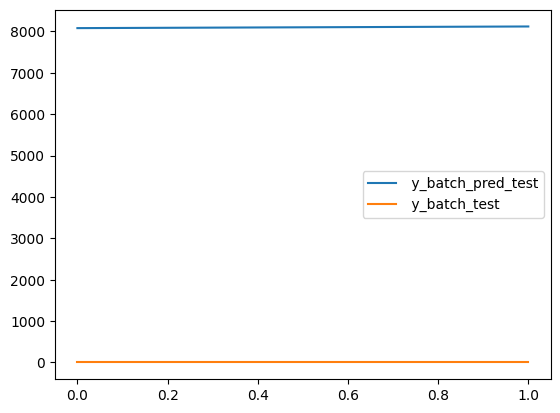

In [55]:
plt.plot(test_pred["y_batch_pred_test"], label = " y_batch_pred_test")
plt.plot(test_pred["y_batch_test"], label = " y_batch_test")
plt.legend()
plt.show()

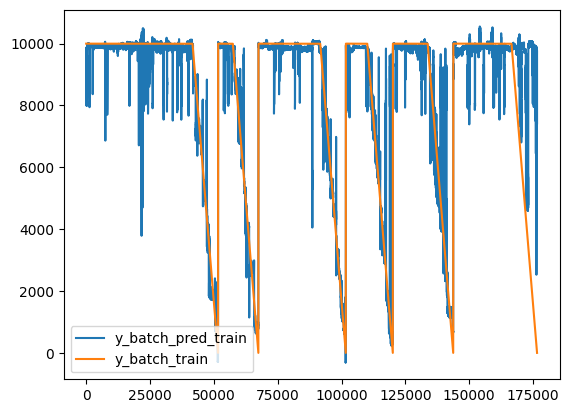

In [52]:
plt.plot(train_pred["y_batch_pred_train"], label = "y_batch_pred_train")
plt.plot(train_pred["y_batch_train"], label = "y_batch_train")
plt.legend()
plt.show()

the interval in the cycles with anomalies (for rtf_id = 4):        cycle
18809  18809
18810  18810
18811  18811
18812  18816
18813  18817
18814  18818


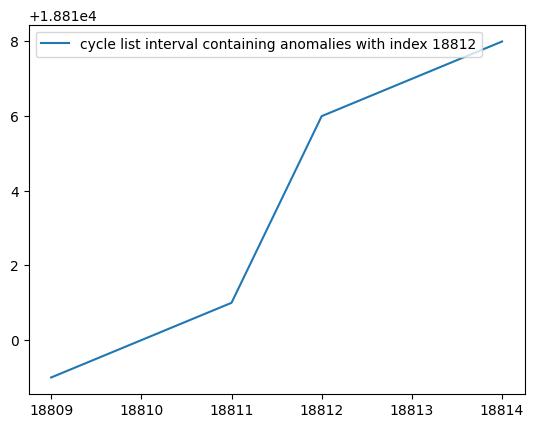

the interval in the cycles with anomalies (for rtf_id = 5):        cycle
15911  15911
15912  15912
15913  15913
15914  15918
15915  15919
15916  15920


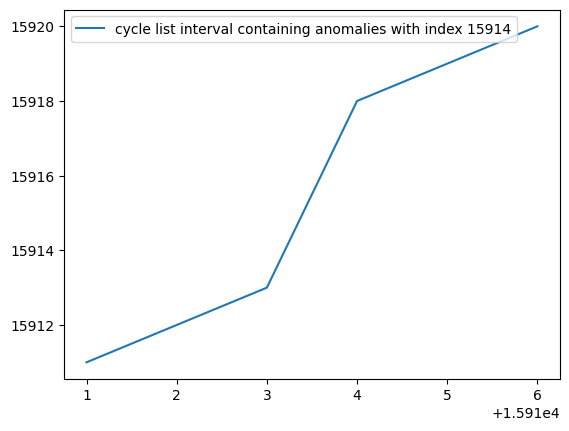

the interval in the cycles with anomalies (for rtf_id = 1):       cycle
9131   9131
9132   9132
9133   9133
9134   9138
9135   9139
9136   9140


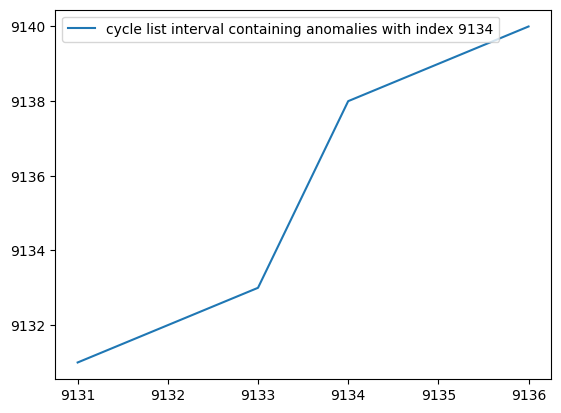


KeyboardInterrupt



In [ ]:
test  = rul.RemainingUsefulLife(train_df,test_df,max_life=1200, epochs= 30)
test.auto_rul()